## Summary notes

Return estimates of the trend, seasoanl, and irregular components of a seaonal time series using the `seasonal_decompose` function in StasModels.

Data was sourced from Rdatasets[^1] using StatsModels `Datasets` package.[^2]

StatsModels' `seasonal_decompose`[^3] function returns an instance of `DecomposeResult`.[^4]

The `plot` method of `DecomposeResult` returns a summary plot showing the original time series and its three components.[^5]
Note that this method does not work for quarterly time series;[^6]
these instead should be plotted using the `plot` method of a Pandas `Series`.

This topic was covered in M249, Book 2, Part 1.4.

## Dependencies

In [1]:
import pandas as pd
from statsmodels import datasets
from statsmodels.tsa import api as tsa
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Main

### Load the data

In [3]:
elecequip = datasets.get_rdataset('elecequip', package='fpp2', cache=True)
elecequip.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    195 non-null    float64
 1   value   195 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


### Initialise and plot the time series

The first observation is in January 1996.

In [4]:
elecequip.data['time'].head(1)

0    1996.0
Name: time, dtype: float64

Initialise the `Series`.

In [5]:
ts_elecequip = pd.Series(
    data=elecequip.data['value'].to_numpy(),
    name='obs',
    index=pd.date_range(
        start='1996-01',
        periods=elecequip.data['value'].size,
        freq='M',
        name='month'
    )
)
ts_elecequip.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 195 entries, 1996-01-31 to 2012-03-31
Freq: M
Series name: obs
Non-Null Count  Dtype  
--------------  -----  
195 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


Plot the time series.

Text(6.085000000000001, 0.5, 'new orders index')

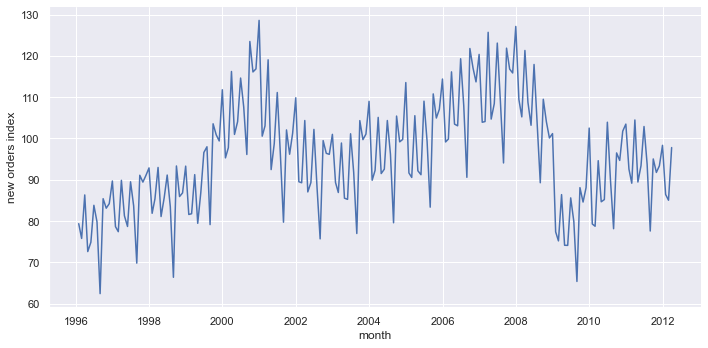

In [6]:
sns.relplot(
        x=ts_elecequip.index,
        y=ts_elecequip,
        kind='line',
        aspect=2
)
plt.ylabel('new orders index')

### Decompose the time series

In [7]:
decomp_ts = tsa.seasonal_decompose(ts_elecequip)

Plot the decomposed time series.
We pass `observed=True` as we've already plotted the time series above.

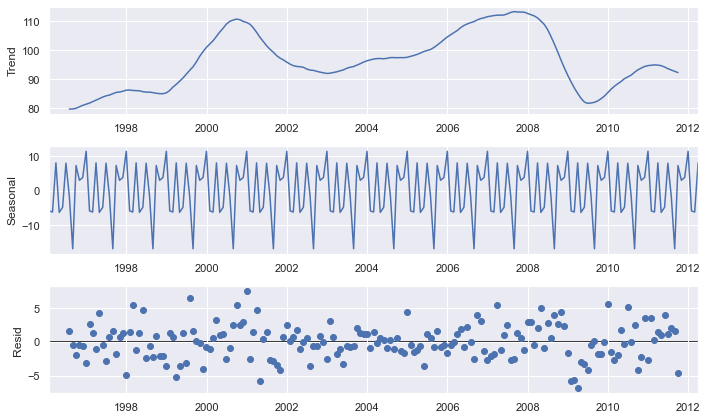

In [8]:
_f = decomp_ts.plot(observed=False)
_f.set_tight_layout(True)
_f.set_figheight(6)
_f.set_figwidth(10)
plt.show()

Plot a specific component by accessing the relevant attribute.

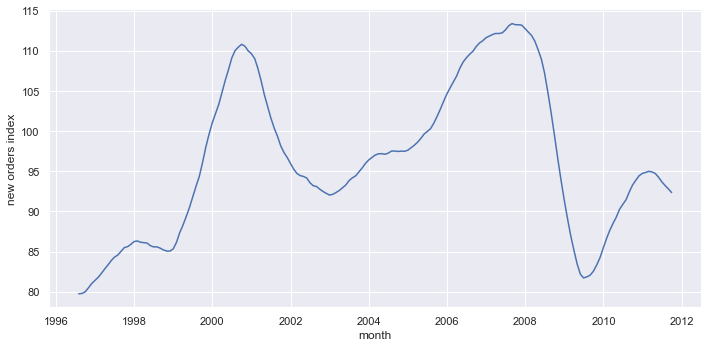

In [9]:
sns.relplot(
        x=decomp_ts.trend.index,
        y=decomp_ts.trend,
        kind='line',
        aspect=2
)
plt.ylabel('new orders index')
plt.show()

Get the seasonal factors.

In [10]:
sfactors = decomp_ts.seasonal[:12]
sfactors.name = 'seasonal factors'
sfactors.index = pd.Index(range(1, 13), name='period')
sfactors

period
1     -5.887662
2     -6.199273
3      8.083171
4     -6.314968
5     -4.818468
6      7.976088
7     -1.575338
8    -16.870416
9      7.304324
10     3.007671
11     3.847366
12    11.447504
Name: seasonal factors, dtype: float64

Plot the seasonally adjusted series.

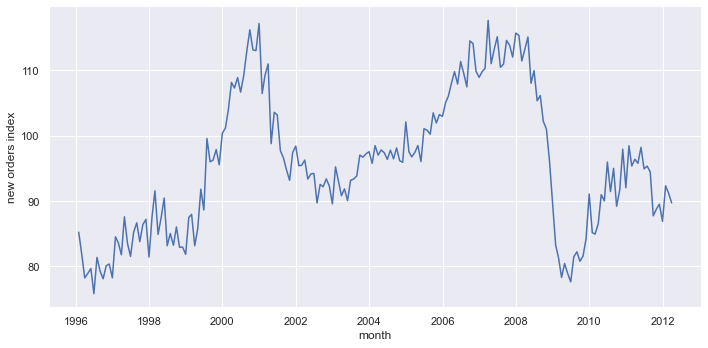

In [11]:
sadjusted = decomp_ts.observed - decomp_ts.seasonal
g = sns.relplot(x=sadjusted.index, y=sadjusted, kind='line', aspect=2)
g.set_ylabels('new orders index')
plt.show()

[^1]: Arel-Bundock V (2022). Rdatasets: A collection of datasets originally distributed in various R packages. R package version 1.0.0, https://vincentarelbundock.github.io/Rdatasets
[^2]: See [The Datasets Package](https://www.statsmodels.org/devel/datasets/index.html)
[^3]: See [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)
[^4]: See [statsmodels.tsa.seasonal.DecomposeResult](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.DecomposeResult.html)
[^5]: Assign the returned object to an instance variable to prevent it being plotted twice
[^6]: It calls the method `infer_freq` that is not supported by `Series` with a `PeriodIndex`
